In [10]:
# todo:

# future: error bars
# return,[[n*(1.-1./(9.*n)-1./(3.*sqrt(n)))^3.-n],[n+sqrt(n+0.75)+1.0-n]]
#In [13]: _Perror((FFD_Y * duration)) / duration

In [2]:
%matplotlib inline
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/scoggim/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


001572802
001721614
001783204
002305277
002985366
003234139
003441906
003539331
003832966
004349043
005033682


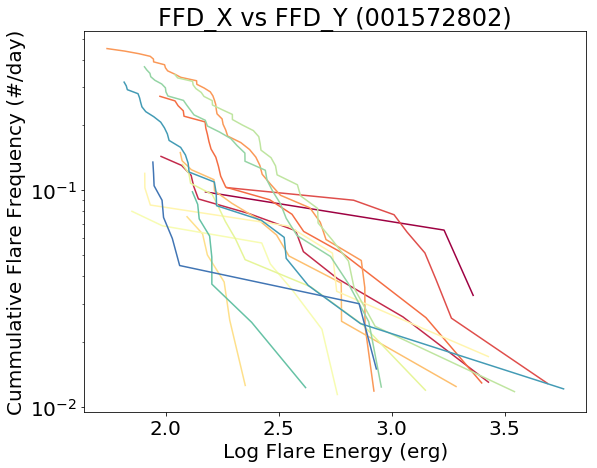

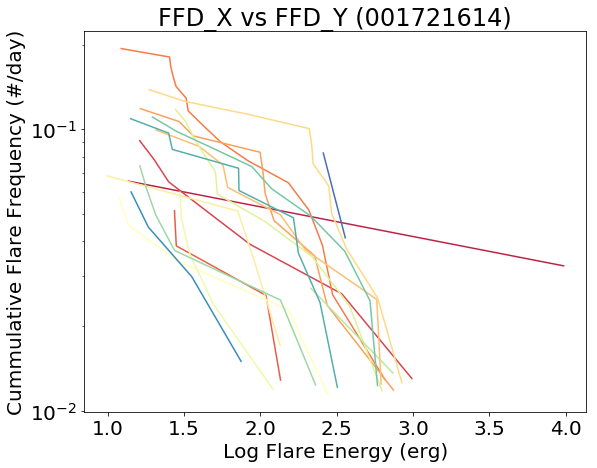

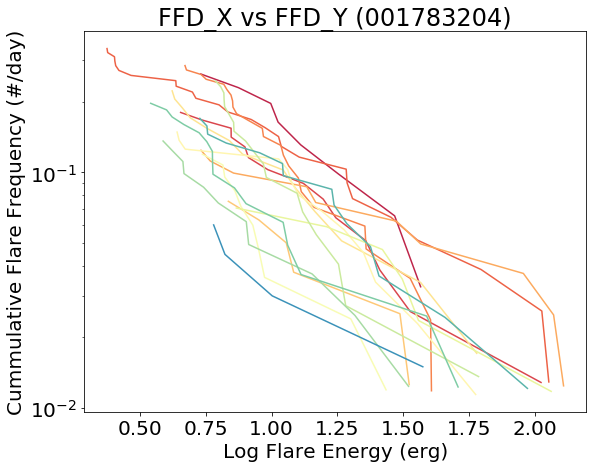

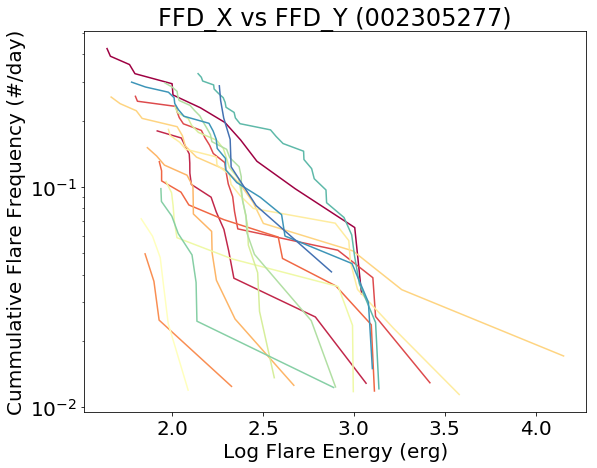

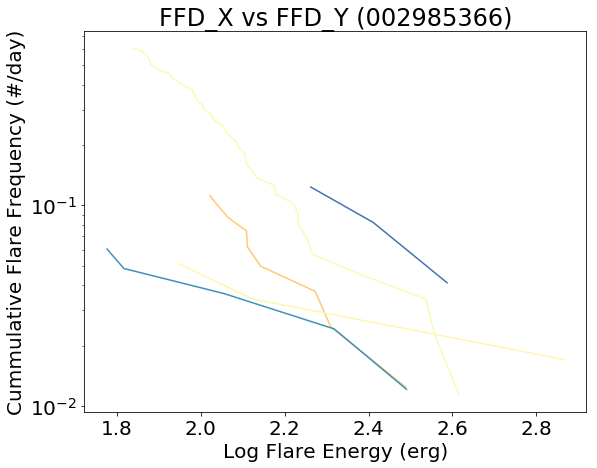

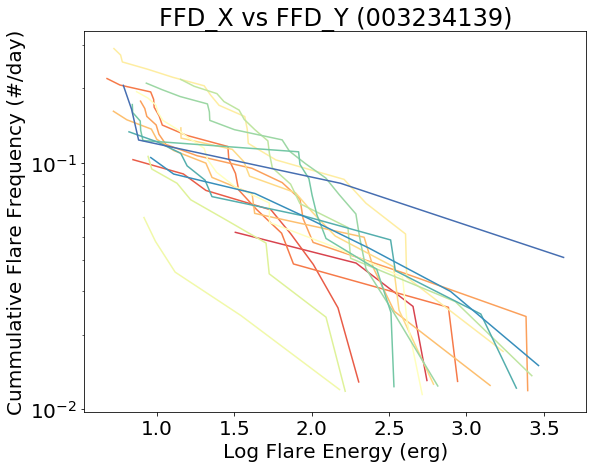

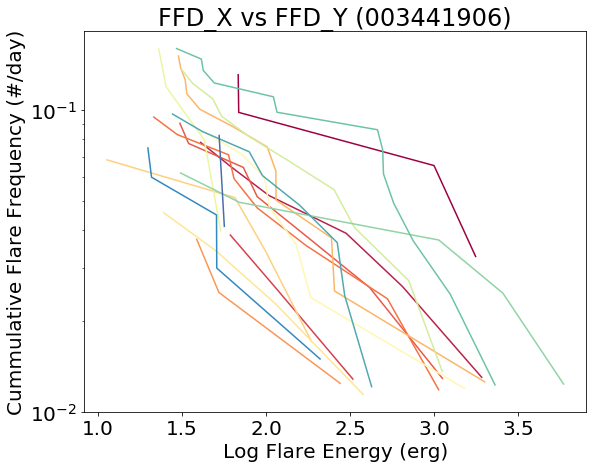

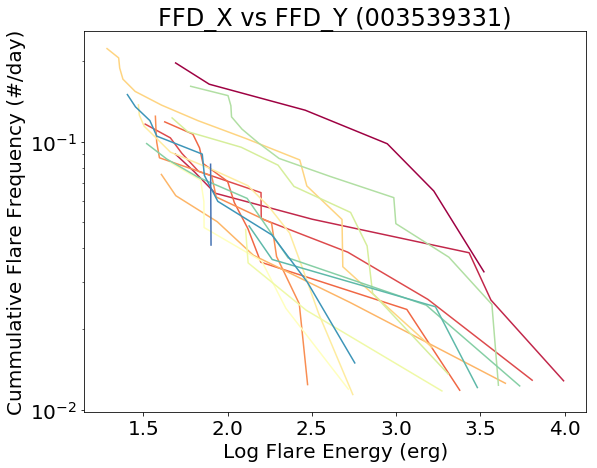

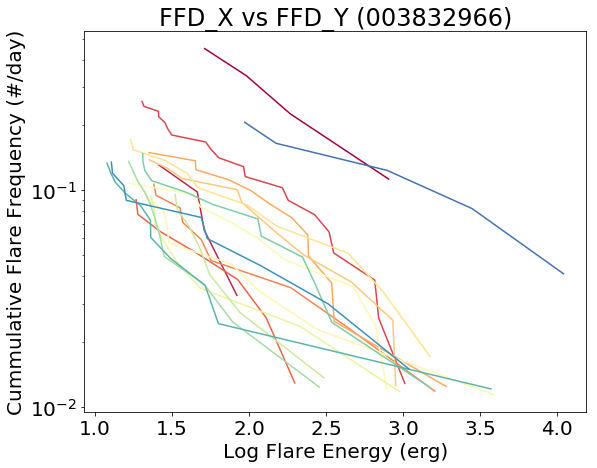

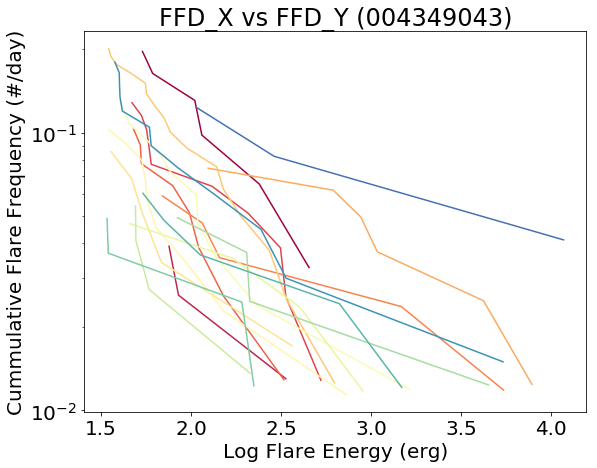

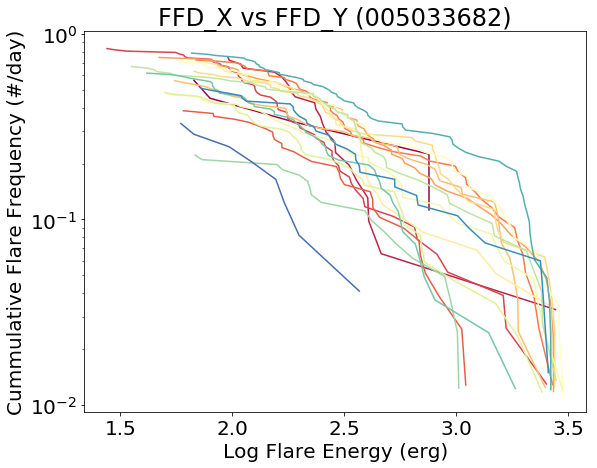

In [6]:
#plotting a reverse cummulative sum for a single KIC# number, hoping for a smooth change in frequency over time
#plotting only the significant data

targets = open("KICs/targets.txt", "r") # a file containing all the KICs we want to plot
EPOINT = 0 # need to fix this

np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")

for line in targets: #going through each KIC
    
    KIC = line.rstrip('\n') #stripping the return off each line
    files = glob('KICs/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    
    plt.figure(figsize=(9,7))
    plt.title("FFD_X vs FFD_Y ("+KIC+')')
    plt.ylabel("Cummulative Flare Frequency (#/day)")
    plt.xlabel("Log Flare Energy (erg)")
    plt.yscale('log')

    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0]  #getting the total duration of each file
                
        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] #This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array

        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk
    
        plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #only plotting significant data, using ok68
        
    plt.savefig('ffd_x-vs-ffd_y-sig-plot/'+KIC+'_sig_FFD.png')



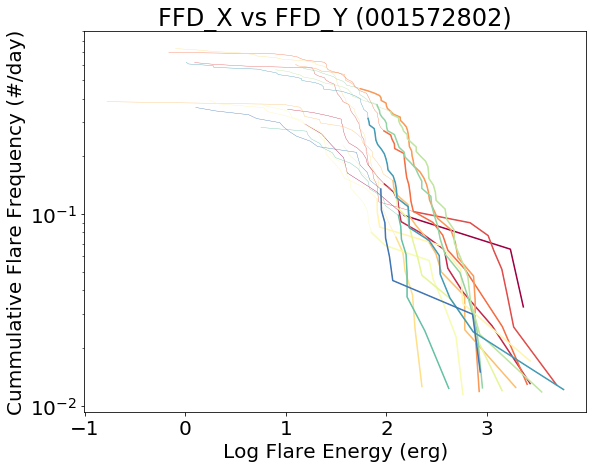

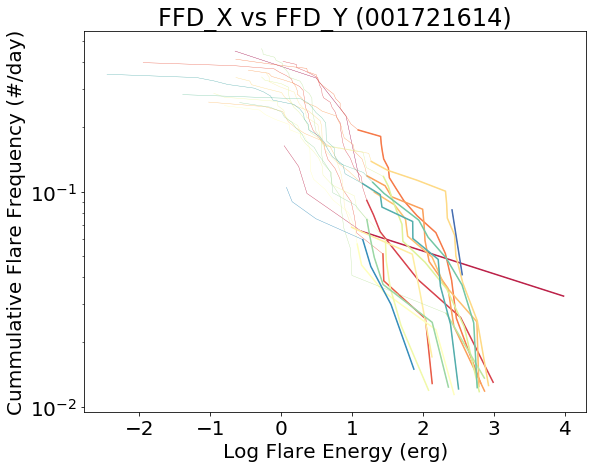

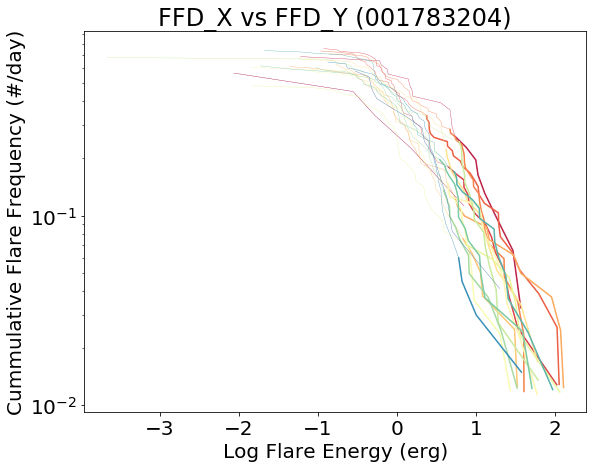

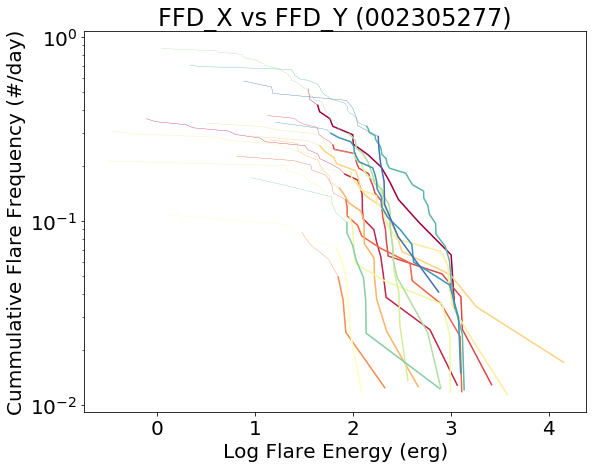

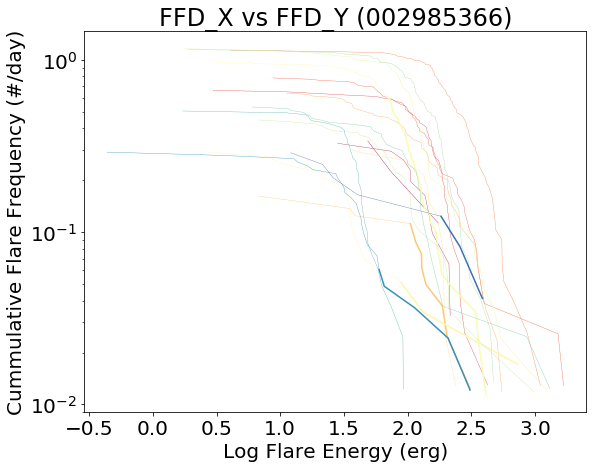

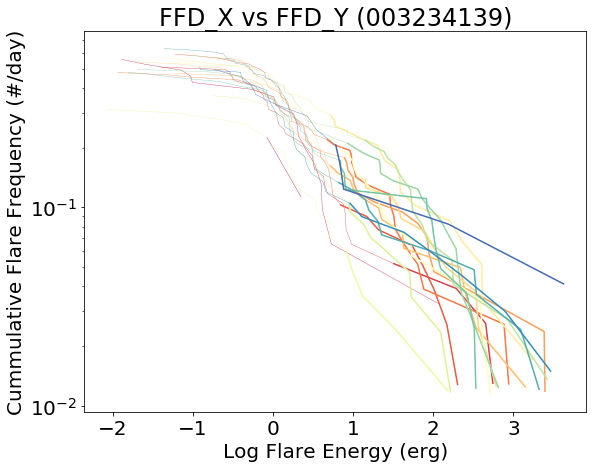

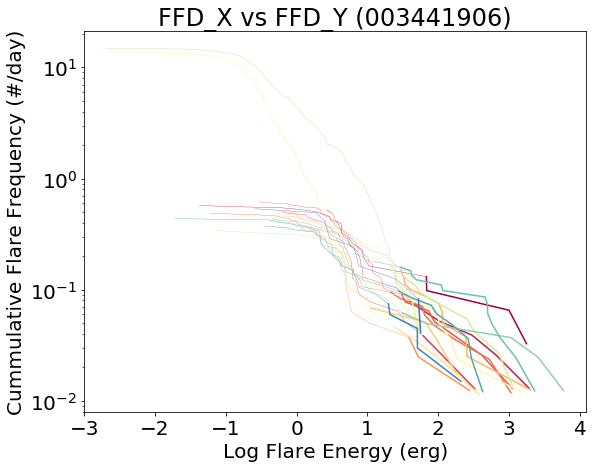

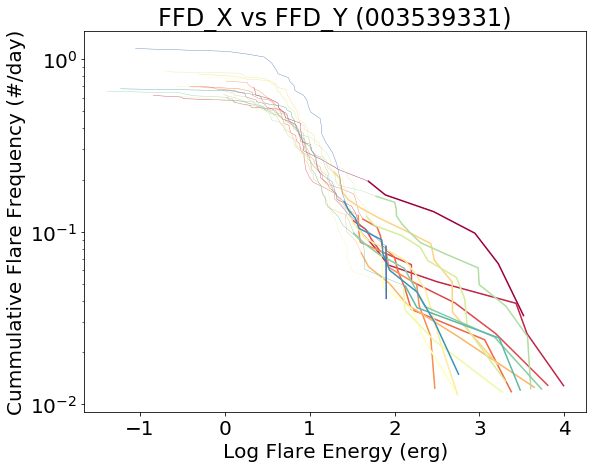

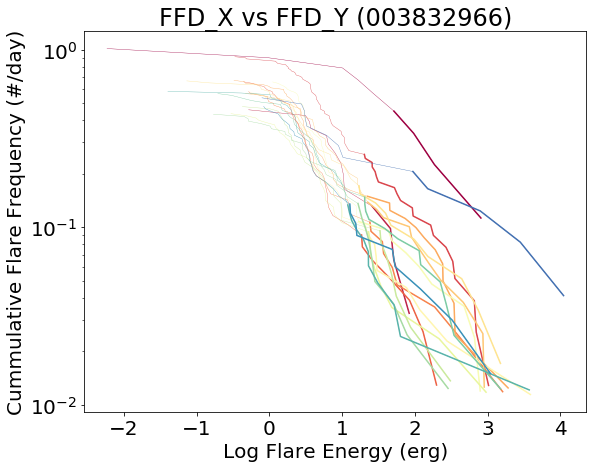

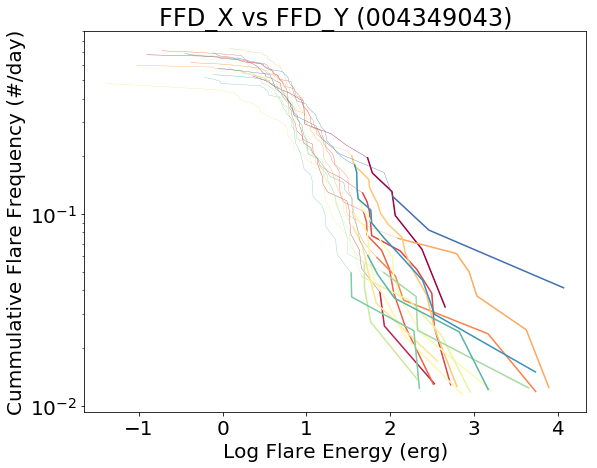

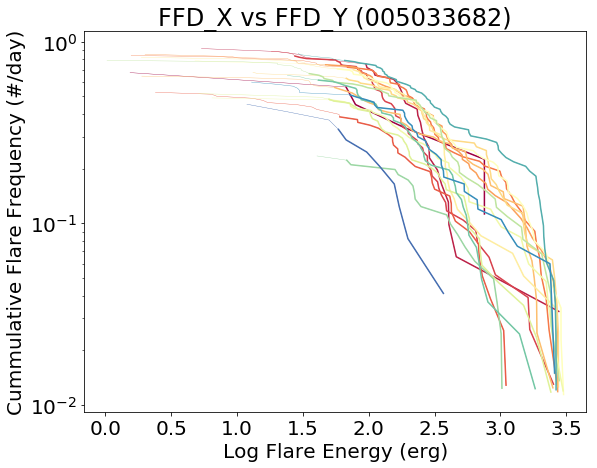

In [68]:
#plotting a reverse cummulative sum for a single KIC# number, hoping for a smooth change in frequency over time
#plotting all of the data, with data below the ED68i cutoff being the thinner lines

targets = open("KICs/targets.txt", "r") # a file containing all the KICs we want to plot
EPOINT = 0 # need to fix this

np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


        
    plt.savefig('ffd_x-vs-ffd_y-whole-plot/'+KIC+'_whole_FFD.png')


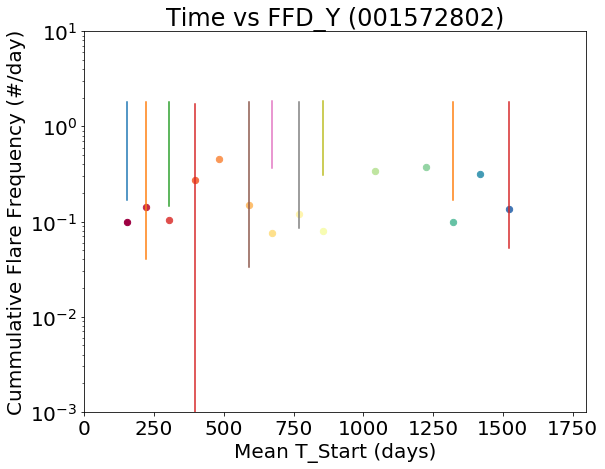

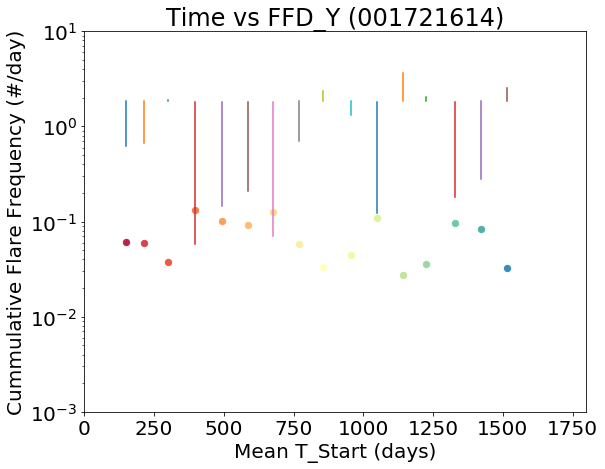

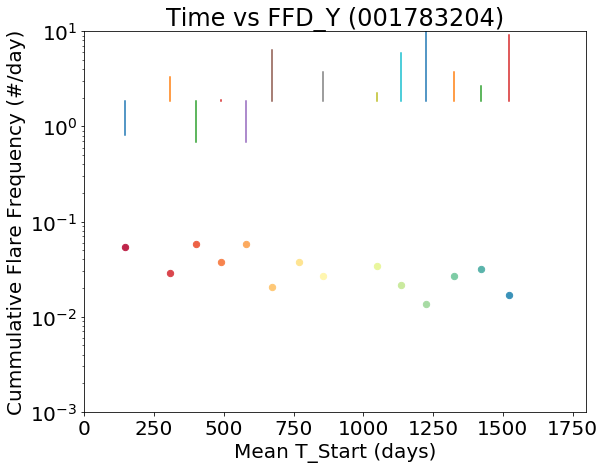

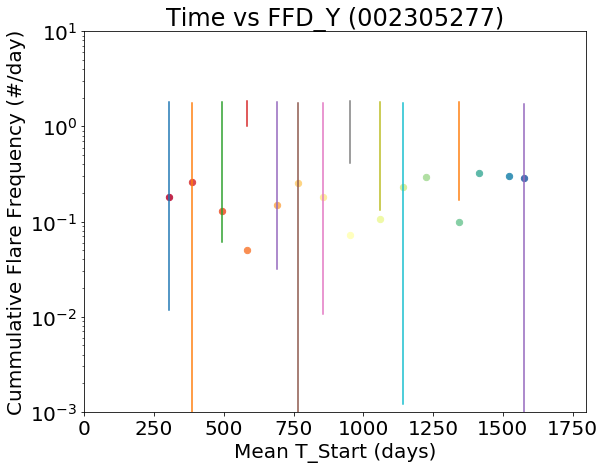

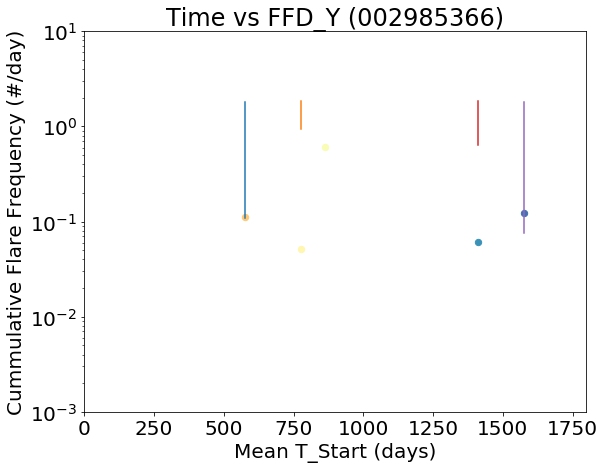

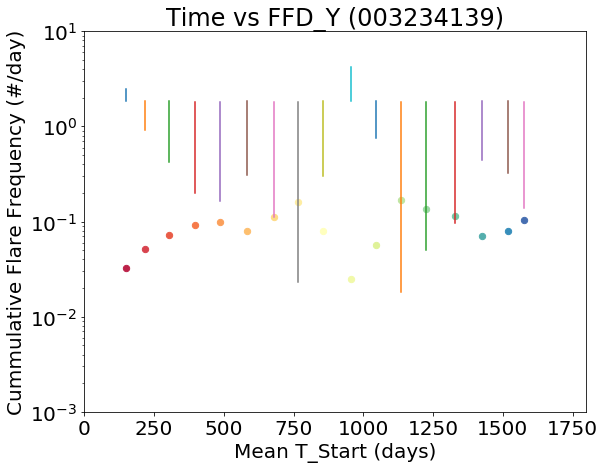

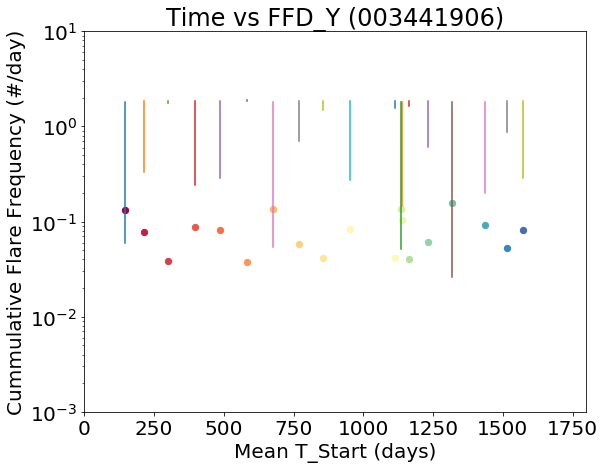

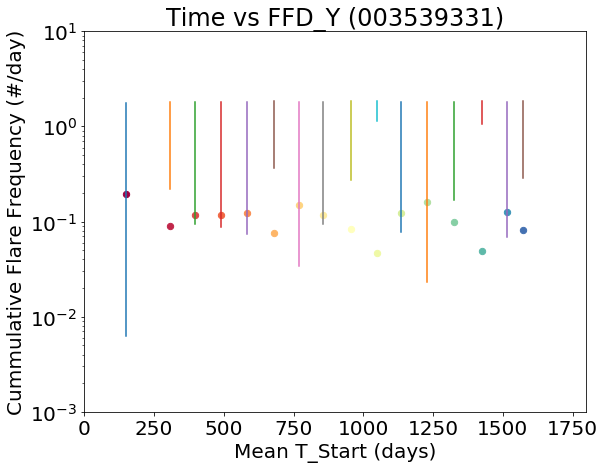

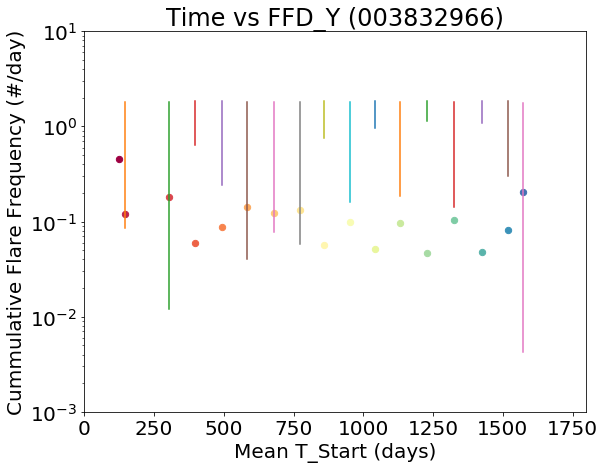

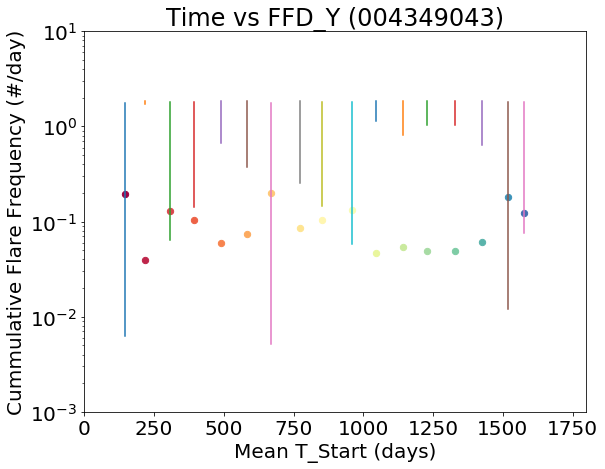

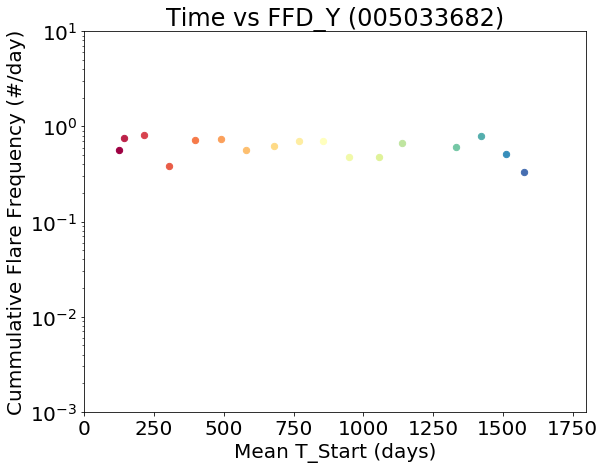

In [13]:
#Specify a fixed log-energy value. Plot the mean-time vs FFD_y values = plot time vs flare rate per day

targets = open("KICS/targets.txt", "r") # a file containing all the KICs we want to plot
EPOINT = 0 # need to fix this

logEnergyConstant = 1.5 + EPOINT # the fixed energy value

np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")

for line in targets: #going through each KIC
    
    KIC = line.rstrip('\n') #stripping the return off each line
    files = glob('KICS/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    
    plt.figure(figsize=(9,7))
    plt.title("Time vs FFD_Y ("+KIC+')')
    plt.ylabel("Cummulative Flare Frequency (#/day)")
    plt.xlabel("Mean T_Start (days)")
    plt.yscale('log')
    plt.ylim([0.001,10])
    plt.xlim([0,1800])
    
    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0]  #getting the total duration of each file

        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] #This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array


        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

        if(np.amax(ffd_xEnergy) >= logEnergyConstant >= np.amin(ffd_xEnergy)): #checking that the energy constant isn't out of bound,
                                                                               #otherwise, interpolate doesn't work

            ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

            meanstart = np.sum(df['t_start'])/len(df['t_start']) #finding the mean time for a file
            
            if any(ok68): #checking if ok68 contains at least one 'true'
                ffd_yForMeanstart = np.interp(logEnergyConstant, ffd_xEnergy[ok68][::-1], ffd_yFrequency[ok68][::-1])#interpolating the ffd_y

                plt.scatter(meanstart, ffd_yForMeanstart, s=40, c = cmap(x/float(len(files))))
            
            
        
                n = ffd_yForMeanstart
                
                #err_up = err_dn = np.sqrt(n + 0.75) + 1.0 # this is the default behavior for N=0

                #xn = np.where((n > 0))[0]
                #if np.size(xn) > 0:
                
                err_dn = np.abs(n * (1.-1./(9. * n)-1./(3.*np.sqrt(n)))**3.-n)
                err_up = np.sqrt(n + 0.75) + 1.0
                stuff = [err_dn-n, err_up-n]
                start = [meanstart, meanstart]
                plt.plot(start, stuff)
               # (meanstart, ffd_yForMeanstart+err_up)
            
            #redo this so that it uses frequency total and not per day


            
    #plt.savefig('time-vs-ffd_y-plot/'+KIC+'_vs_time.png')


In [11]:
##to be used from terminal
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

#a bunch of checks, looking for correct input
if(len(sys.argv) == 1 or (sys.argv[1] == "help")):
    print("input: 'flaregraphs.py'   'KIC_number_targets.txt' 'evf'             for an energy vs frequency plot")
    print("input: 'flaregraphs.py'   'KIC_number_targets.txt' 'evfs'            for an energy vs frequency plot, plotting only the data above the ED68i cutoff")
    print("input: 'flaregraphs.py'   'KIC_number_targets.txt' 'tvf' 'energy#'   for a time vs frequency plot, fixed at the specified log-energy value")
    sys.exit()

try:
    file = sys.argv[1]
    targets = open(file, "r") # a file containing all the KICs we want to plot
except:
    print("Error: Cannot open "+file+". Type 'help' for a list of possible commands")
    sys.exit()

if((len(sys.argv) == 2) or (not((sys.argv[2] == "evfs") or (sys.argv[2] == "evf") or (sys.argv[2] == "tvf")))):
    print("Error: Unrecognized command. Type 'help' for a list of possible commands.")
    sys.exit()




np.seterr(invalid='ignore') #ignore the Nans
plt.rcParams.update({'font.size': 20}) #font size
cmap = plt.cm.Spectral # color scheme -- visible color spectrum, starting with red as the earliest
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1",
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model",
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")

EPOINT = 0 # need to fix this



def plotEVF(): #plotting energy vs frequency

    for line in targets: #going through each KIC

        KIC = line.rstrip('\n') #stripping the return off each line
        files = glob('KICs/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star

        plt.figure(figsize=(9,7))
        plt.title("FFD_X vs FFD_Y ("+KIC+')')
        plt.ylabel("Cummulative Flare Frequency (#/day)")
        plt.xlabel("Log Flare Energy (erg)")
        plt.yscale('log')

        for x in range(len(files)):

            toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None,
                                    delim_whitespace=True, usecols=(7,)
                                   ).iloc[0].values[0]  #getting the total duration of each file

            df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
            energy = df['Equiv_Dur'] #This is the energy column of the flare data
            sort = np.argsort(energy) #get indices that would sort the energy array

            ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
            ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

            ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

            plt.plot(ffd_xEnergy, ffd_yFrequency, lw = .35, c = cmap(x/float(len(files)))) #all data
            plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #significant data

        #plt.savefig('ffd_x-vs-ffd_y-whole-plot/'+KIC+'_whole_FFD.png')


    plt.show()


def plotEVFsig(): #plotting energy vs frequency but only for significant data

    for line in targets: #going through each KIC

        KIC = line.rstrip('\n') #stripping the return off each line
        files = glob('KICs/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star

        plt.figure(figsize=(9,7))
        plt.title("FFD_X vs FFD_Y ("+KIC+')')
        plt.ylabel("Cummulative Flare Frequency (#/day)")
        plt.xlabel("Log Flare Energy (erg)")
        plt.yscale('log')

        for x in range(len(files)):

            toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None,
                                    delim_whitespace=True, usecols=(7,)
                                   ).iloc[0].values[0]  #getting the total duration of each file

            df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
            energy = df['Equiv_Dur'] #This is the energy column of the flare data
            sort = np.argsort(energy) #get indices that would sort the energy array

            ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
            ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

            ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

            plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #significant data

        #plt.savefig('ffd_x-vs-ffd_y-sig-plot/'+KIC+'_sig_FFD.png')


    plt.show()



def plotTVF(logEnergyConstant): #plotting time vs frequency

    for line in targets: #going through each KIC

        KIC = line.rstrip('\n') #stripping the return off each line
        files = glob('KICS/'+KIC+"/*.flare") #Glob all of the files in the directory - get all flares for a star

        plt.figure(figsize=(9,7))
        plt.title("Time vs FFD_Y ("+KIC+')')
        plt.ylabel("Cummulative Flare Frequency (#/day)")
        plt.xlabel("Mean T_Start (days)")
        plt.yscale('log')
        plt.ylim([0.001,10])
        plt.xlim([0,1800])

        for x in range(len(files)):

            toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None,
                                    delim_whitespace=True, usecols=(7,)
                                   ).iloc[0].values[0]  #getting the total duration of each file

            df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
            energy = df['Equiv_Dur'] #This is the energy column of the flare data
            sort = np.argsort(energy) #get indices that would sort the energy array


            ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
            ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day

            if(np.amax(ffd_xEnergy) >= logEnergyConstant >= np.amin(ffd_xEnergy)): #checking that the energy constant isn't out of bound,
                                                                                   #otherwise, interpolate doesn't work

                ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

                meanstart = np.sum(df['t_start'])/len(df['t_start']) #finding the mean time for a file

                if any(ok68): #checking if ok68 contains at least one 'true'
                    ffd_yForMeanstart = np.interp(logEnergyConstant, ffd_xEnergy[ok68][::-1], ffd_yFrequency[ok68][::-1])#interpolating the ffd_y

                    plt.scatter(meanstart, ffd_yForMeanstart, s=40, c = cmap(x/float(len(files))))

        #plt.savefig('time-vs-ffd_y-plot/'+KIC+'_E='+str(logEnergyConstant)+'_vs_time.png')

    plt.show()

def _Perror(n, full=False, down=False):
    '''
    Calculate the asymmetric Poisson error, using Eqn 7
    and Eqn 12 in Gehrels 1986 ApJ, 3030, 336
    Parameters
    ----------
    n
    full
    Returns
    -------
    '''

    err_up = err_dn = np.sqrt(n + 0.75) + 1.0 # this is the default behavior for N=0

    xn = np.where((n > 0))[0]
    if np.size(xn) > 0:
        err_dn[xn] = np.abs(n[xn] * (1.-1./(9. * n[xn])-1./(3.*np.sqrt(n[xn])))**3.-n[xn])
        err_up[xn] = n[xn] + np.sqrt(n[xn] + 0.75) + 1.0 - n[xn]
    # else:
    #     err_up = np.sqrt(n + 0.75) + 1.0
    #     err_dn = err_up
    #     # err_up = err_dn = np.nan

    if full is True:
        return err_dn, err_up
    else:
        if down is True:
            return err_dn
        else:
            return err_up



if(sys.argv[2] == "evf"): #plotting energy vs frequency
    plotEVF()

elif(sys.argv[2] == "evfs"): #plotting significant energy vs frequency
    plotEVFsig()

elif(sys.argv[2] == "tvf"): #plotting time vs frequency
    try:
        logEnergyConstant = float(sys.argv[3]) + EPOINT # the fixed energy value
    except:
        print("Error: Cannot convert fixed-energy value to a float OR no fixed-energy value was provided . Type 'help' for a list of possible commands.")
        sys.exit()
    plotTVF(logEnergyConstant)
